In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os


data = pd.read_csv('IPG2211A2N.csv',index_col=0)
data.head()




,IPG2211A2N
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [2]:
data.info



<bound method DataFrame.info of             IPG2211A2N
DATE                  
1939-01-01      3.3842
1939-02-01      3.4100
1939-03-01      3.4875
1939-04-01      3.5133
1939-05-01      3.5133
...                ...
2019-01-01    123.7687
2019-02-01    113.0736
2019-03-01    106.6538
2019-04-01     88.6460
2019-05-01     92.3776

[965 rows x 1 columns]>

In [3]:
data.index = pd.to_datetime(data.index)   # convert index column to data_time



In [4]:
data.columns = ['Energy Production']  
data.head()

,Energy Production
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [5]:
import plotly
import cufflinks as cf
cf.go_offline()

data.iplot(title="Energy Production Between Jan 1939 to May 2019")


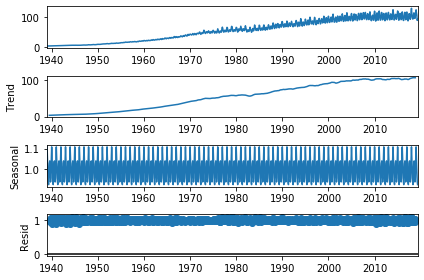

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')

fig = result.plot()




In [7]:

from pmdarima import auto_arima

stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12, # Seasonality is 12 months
                           start_P=0, seasonal=True, # Seasonal variations - yearly trend
                           d=1, D=1, trace=True, # Print Status on the fits. Verbose output
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3802.455, Time=1.27 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4319.328, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4151.688, Time=0.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3927.033, Time=0.69 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.71 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=3801.631, Time=1.50 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=3983.354, Time=1.13 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=3771.642, Time=3.47 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=3855.143, Time=5.13 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=3752.073, Time=10.85 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=3794.365, Time=6.47 sec
 ARIMA(0,1,1)(2,1,2)[12]             : AIC=3853.198, Time=7.51 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=3897.166, Time=7.92 sec
 ARIMA(2,1,1)(2,1,2)[12]             : AIC=3751.732, Time=9.32 sec
 ARIMA(2,1,1)(1,1,2)[12

In [8]:

train = data.loc['1939-01-01':'2015-12-01']
test = data.loc['2016-01-01':]

In [9]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 1), scoring_args={}, seasonal_order=(2, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

In [ ]:
future_forecast = stepwise_model.predict(n_periods=41)

future_forecast = pd.DataFrame(future_forecast, index=test.index, columns=['Prediction'])


In [ ]:
pd.concat([test, future_forecast], axis=1).iplot()

In [ ]:
stepwise_model.fit(data)   # Train model with full data
future_forecast_1year = stepwise_model.predict(n_periods=13)

next_year = [pd.to_datetime('2019-05-01'),
            pd.to_datetime('2019-06-01'),
            pd.to_datetime('2019-07-01'),
            pd.to_datetime('2019-08-01'),
            pd.to_datetime('2019-09-01'),
            pd.to_datetime('2019-10-01'),
            pd.to_datetime('2019-11-01'),
            pd.to_datetime('2019-12-01'),
            pd.to_datetime('2020-01-01'),
            pd.to_datetime('2020-02-01'),
            pd.to_datetime('2020-03-01'),
            pd.to_datetime('2020-04-01'),
            pd.to_datetime('2020-05-01')]


In [ ]:
future_forecast_1year = pd.DataFrame(future_forecast_1year, index=next_year, columns=['Prediction'])



In [ ]:

pd.concat([data,future_forecast_1year],axis=1).iplot()